In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics

In [2]:
pd.set_option('future.no_silent_downcasting', True)
PALETTE = sns.color_palette('flare_r', as_cmap=True)

In [3]:
# Root directory for an experiment
ROOT = os.path.join(os.getcwd(), 'temperature_experiments')
# Available datasets
datasets = ['MNIST', 'FMNIST', 'CIFAR10', 'PATHMNIST', 'BLOODMNIST']
# Number of clients
no_of_clients = ['15', '30']
# Types of splits in terms of overlap
split_types = ['nonoverlaping', 'overlaping']
# Types of splits in terms of balance
split_balance = ['balanced', 'imbalanced']

In [4]:
registered_temperature = {}
# All the datasets except TISSUEMNIST
for dataset in datasets:
    for type in split_types:
        for balance in split_balance:
            for no in no_of_clients:
                path = os.path.join(ROOT, dataset, type, balance, no)
                dir_name = f"{dataset}_{type}_{balance}_{no}"
                registered_temperature[dir_name] = pd.read_csv(os.path.join(ROOT, dataset, type, balance, no, \
                    dir_name, 'results', 'clusters_temperature.csv'), names=['temperature'], index_col=0)
                             
                                
# # Tissue mnist
# dataset = 'TISSUEMNIST'
# no = '15'
# for type in split_types:
#     for balance in split_balance:
#         path = os.path.join(ROOT, dataset, type, balance, no)
#         dir_name = f"{dataset}_{type}_{balance}_{no}"
#         registered_temperature[dir_name] = pd.read_csv(os.path.join(ROOT, dataset, type, balance, no, \
#             dir_name, 'results', 'clusters_temperature.csv'), names=['temperature'], index_col=0)

## Section I: Individual Analysis

In [5]:
FIGSIZE = (10, 12)

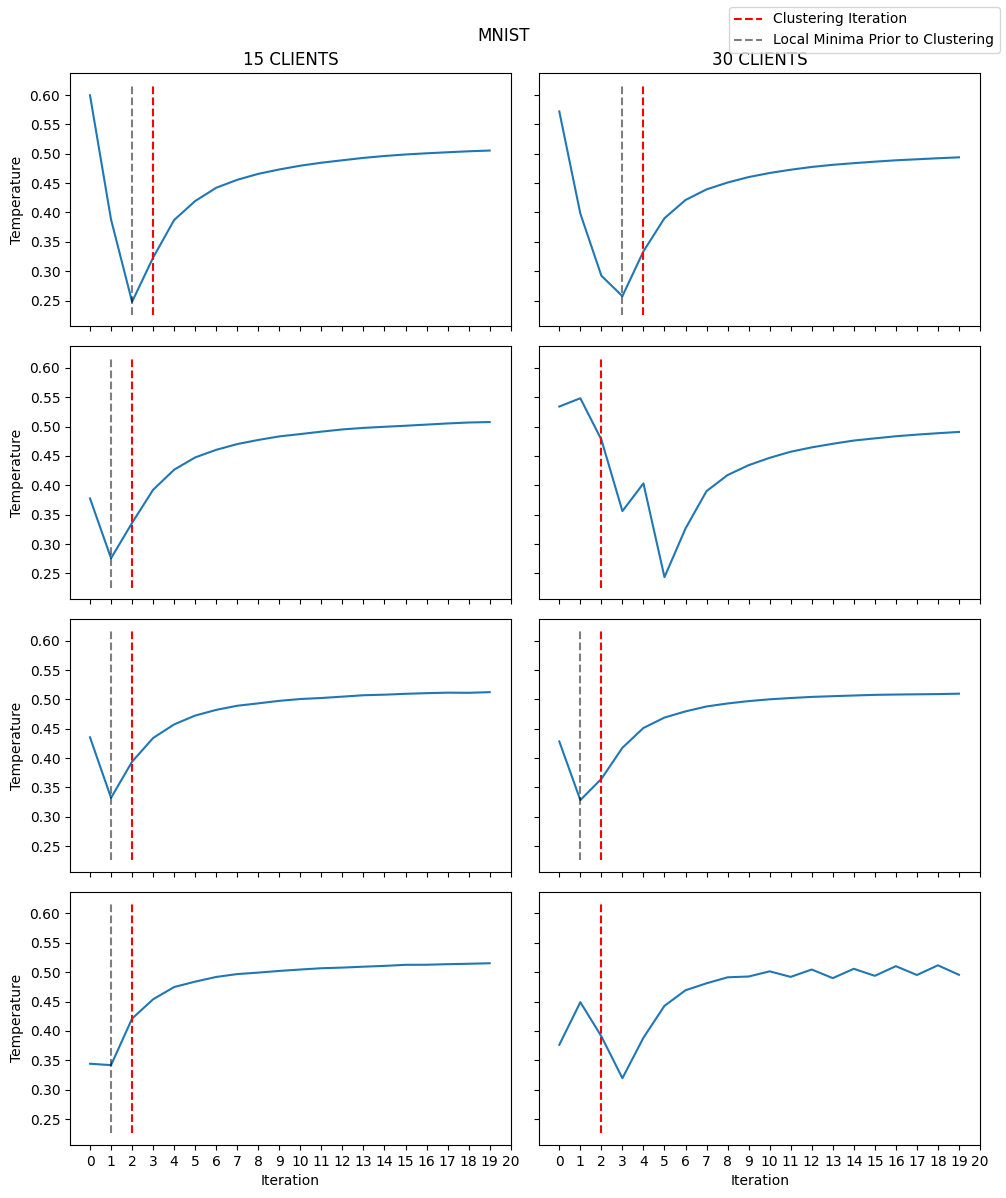

In [6]:
fig, axes = plt.subplots(4, 2, figsize=FIGSIZE, sharey=True, sharex=True)
round_cutoff = 20

axes[0][0].set_title("15 CLIENTS")
axes[0][0].plot(registered_temperature['MNIST_overlaping_balanced_15'][:round_cutoff])
axes[1][0].plot(registered_temperature['MNIST_overlaping_imbalanced_15'][:round_cutoff])
axes[2][0].plot(registered_temperature['MNIST_nonoverlaping_balanced_15']['temperature'][:round_cutoff])
axes[3][0].plot(registered_temperature['MNIST_nonoverlaping_imbalanced_15']['temperature'][:round_cutoff])

axes[0][1].set_title("30 CLIENTS")
axes[0][1].plot(registered_temperature['MNIST_overlaping_balanced_30'][:round_cutoff])
axes[1][1].plot(registered_temperature['MNIST_overlaping_imbalanced_30'][:round_cutoff])
axes[2][1].plot(registered_temperature['MNIST_nonoverlaping_balanced_30']['temperature'][:round_cutoff])
axes[3][1].plot(registered_temperature['MNIST_nonoverlaping_imbalanced_30']['temperature'][:round_cutoff])

# Plots clustering moment
ymin, ymax = plt.ylim()
axes[0][0].vlines(x=3, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed', label='Clustering Iteration')
axes[0][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5, label='Local Minima Prior to Clustering')
axes[1][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[1][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[2][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[3][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

axes[0][1].vlines(x=4, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[0][1].vlines(x=3, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[1][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[3][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

axes[3][0].set_xlabel('Iteration')
axes[3][1].set_xlabel('Iteration')
for a in range(4):
    axes[a][0].set_ylabel('Temperature')
plt.xticks(range(0, round_cutoff+1))
fig.suptitle("MNIST")
fig.legend()
fig.tight_layout()

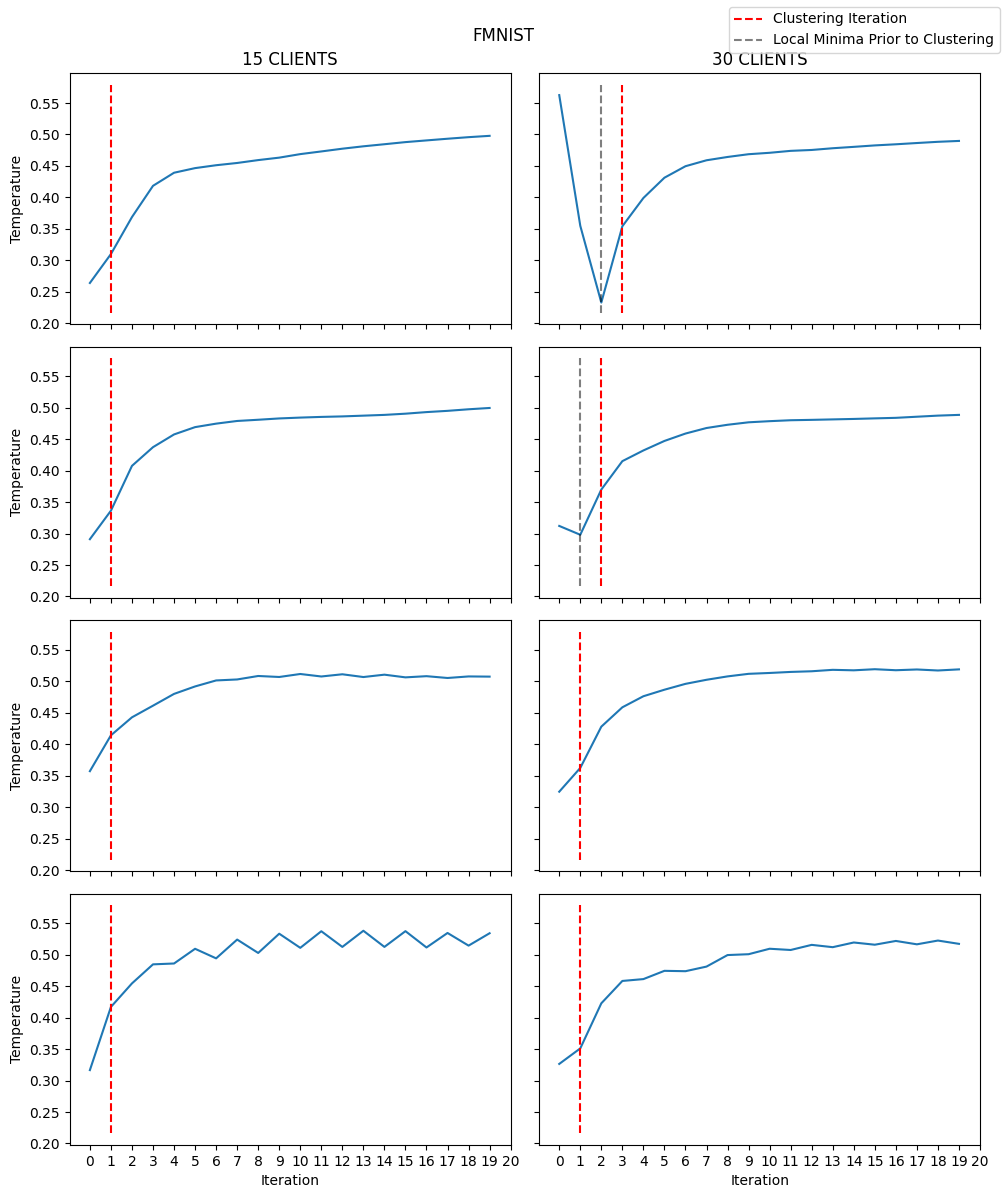

In [7]:
fig, axes = plt.subplots(4, 2, figsize=FIGSIZE, sharey=True, sharex=True)
round_cutoff = 20

axes[0][0].set_title("15 CLIENTS")
axes[0][0].plot(registered_temperature['FMNIST_overlaping_balanced_15'][:round_cutoff])
axes[1][0].plot(registered_temperature['FMNIST_overlaping_imbalanced_15'][:round_cutoff])
axes[2][0].plot(registered_temperature['FMNIST_nonoverlaping_balanced_15']['temperature'][:round_cutoff])
axes[3][0].plot(registered_temperature['FMNIST_nonoverlaping_imbalanced_15']['temperature'][:round_cutoff])

axes[0][1].set_title("30 CLIENTS")
axes[0][1].plot(registered_temperature['FMNIST_overlaping_balanced_30'][:round_cutoff])
axes[1][1].plot(registered_temperature['FMNIST_overlaping_imbalanced_30'][:round_cutoff])
axes[2][1].plot(registered_temperature['FMNIST_nonoverlaping_balanced_30']['temperature'][:round_cutoff])
axes[3][1].plot(registered_temperature['FMNIST_nonoverlaping_imbalanced_30']['temperature'][:round_cutoff])

# Plots clustering moment
ymin, ymax = plt.ylim()
axes[0][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed', label='Clustering Iteration')
axes[1][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

axes[0][1].vlines(x=3, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[0][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5, label='Local Minima Prior to Clustering')
axes[1][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[1][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[2][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

axes[3][0].set_xlabel('Iteration')
axes[3][1].set_xlabel('Iteration')
for a in range(4):
    axes[a][0].set_ylabel('Temperature')
fig.suptitle("FMNIST")
plt.xticks(range(0, round_cutoff+1))
fig.tight_layout()
fig.legend()

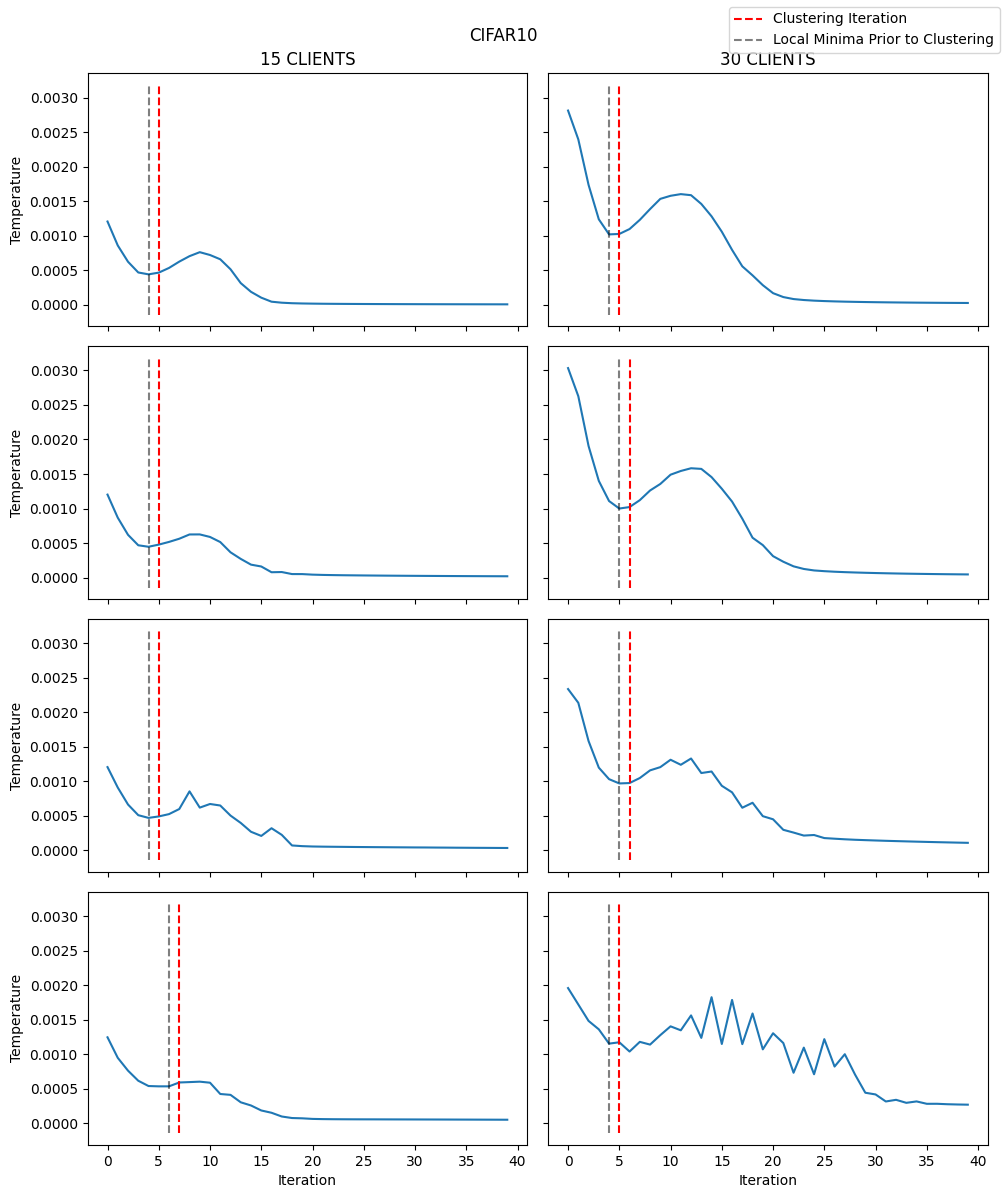

In [8]:
fig, axes = plt.subplots(4, 2, figsize=FIGSIZE, sharey=True, sharex=True)
round_cutoff = 40

axes[0][0].set_title("15 CLIENTS")
axes[0][0].plot(registered_temperature['CIFAR10_overlaping_balanced_15'][:round_cutoff])
axes[1][0].plot(registered_temperature['CIFAR10_overlaping_imbalanced_15'][:round_cutoff])
axes[2][0].plot(registered_temperature['CIFAR10_nonoverlaping_balanced_15']['temperature'][:round_cutoff])
axes[3][0].plot(registered_temperature['CIFAR10_nonoverlaping_imbalanced_15']['temperature'][:round_cutoff])

axes[0][1].set_title("30 CLIENTS")
axes[0][1].plot(registered_temperature['CIFAR10_overlaping_balanced_30'][:round_cutoff])
axes[1][1].plot(registered_temperature['CIFAR10_overlaping_imbalanced_30'][:round_cutoff])
axes[2][1].plot(registered_temperature['CIFAR10_nonoverlaping_balanced_30']['temperature'][:round_cutoff])
axes[3][1].plot(registered_temperature['CIFAR10_nonoverlaping_imbalanced_30']['temperature'][:round_cutoff])

# Plots clustering moment
ymin, ymax = plt.ylim()
axes[0][0].vlines(x=5, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed', label='Clustering Iteration')
axes[0][0].vlines(x=4, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5, label='Local Minima Prior to Clustering')
axes[1][0].vlines(x=5, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[1][0].vlines(x=4, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[2][0].vlines(x=5, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][0].vlines(x=4, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[3][0].vlines(x=7, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][0].vlines(x=6, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

axes[0][1].vlines(x=5, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[0][1].vlines(x=4, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[1][1].vlines(x=6, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[1][1].vlines(x=5, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[2][1].vlines(x=6, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][1].vlines(x=5, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)
axes[3][1].vlines(x=5, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][1].vlines(x=4, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

axes[3][0].set_xlabel('Iteration')
axes[3][1].set_xlabel('Iteration')
for a in range(4):
    axes[a][0].set_ylabel('Temperature')
plt.xticks(range(0, round_cutoff+1, 5))
fig.suptitle("CIFAR10")
fig.legend()
fig.tight_layout()

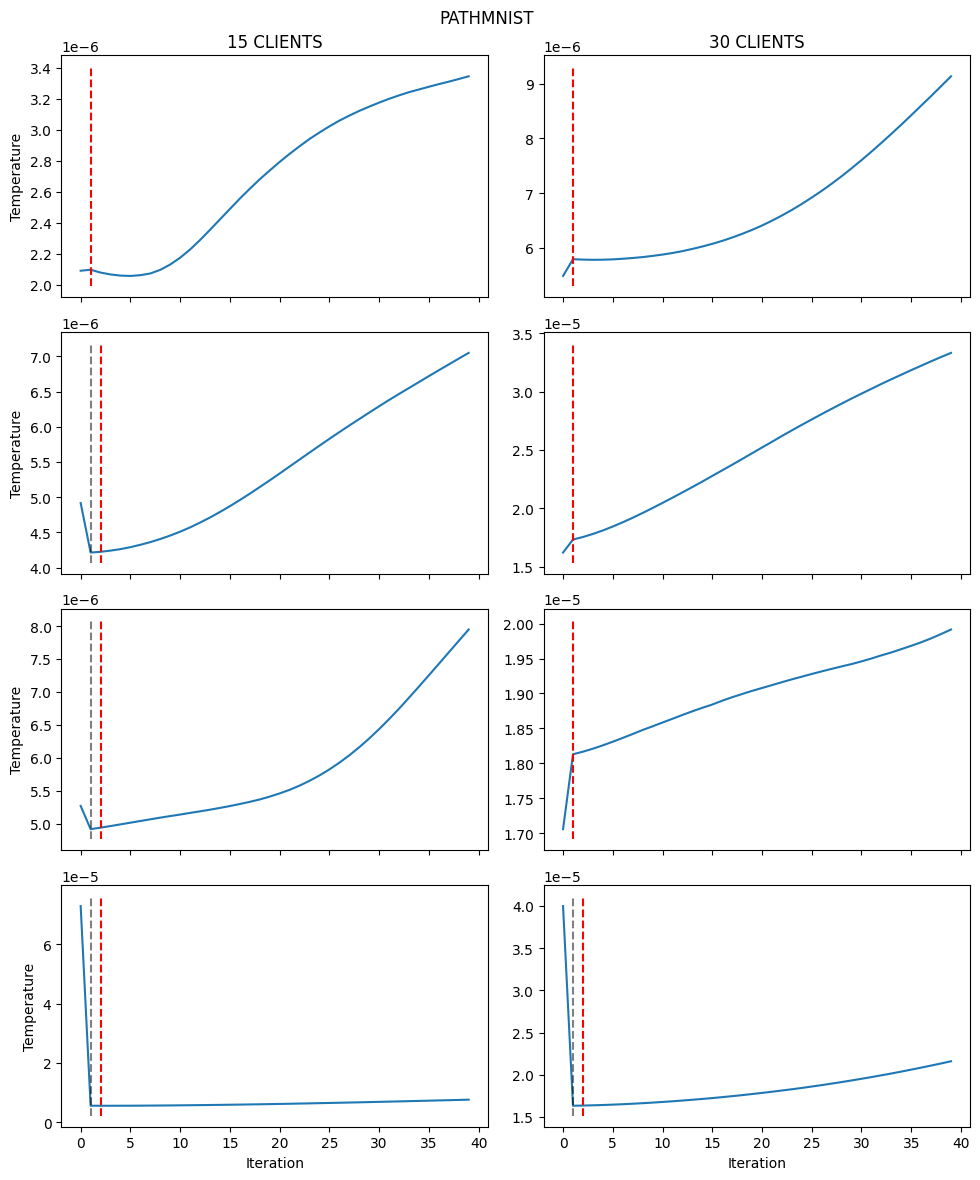

In [9]:
fig, axes = plt.subplots(4, 2, figsize=FIGSIZE, sharey=False, sharex=True)
round_cutoff = 40

axes[0][0].set_title("15 CLIENTS")
axes[0][0].plot(registered_temperature['PATHMNIST_overlaping_balanced_15'][:round_cutoff])
axes[1][0].plot(registered_temperature['PATHMNIST_overlaping_imbalanced_15'][:round_cutoff])
axes[2][0].plot(registered_temperature['PATHMNIST_nonoverlaping_balanced_15']['temperature'][:round_cutoff])
axes[3][0].plot(registered_temperature['PATHMNIST_nonoverlaping_imbalanced_15']['temperature'][:round_cutoff])

axes[0][1].set_title("30 CLIENTS")
axes[0][1].plot(registered_temperature['PATHMNIST_overlaping_balanced_30'][:round_cutoff])
axes[1][1].plot(registered_temperature['PATHMNIST_overlaping_imbalanced_30'][:round_cutoff])
axes[2][1].plot(registered_temperature['PATHMNIST_nonoverlaping_balanced_30']['temperature'][:round_cutoff])
axes[3][1].plot(registered_temperature['PATHMNIST_nonoverlaping_imbalanced_30']['temperature'][:round_cutoff])

# Plots clustering moment
ymin, ymax = axes[0][0].get_ylim()
axes[0][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed', label='Clustering Iteration')

ymin, ymax = axes[1][0].get_ylim()
axes[1][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[1][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5, label='Local Minima Prior to Clustering')

ymin, ymax = axes[2][0].get_ylim()
axes[2][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

ymin, ymax = axes[3][0].get_ylim()
axes[3][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

ymin, ymax = axes[0][1].get_ylim()
axes[0][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

ymin, ymax = axes[1][1].get_ylim()
axes[1][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

ymin, ymax = axes[2][1].get_ylim()
axes[2][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

ymin, ymax = axes[3][1].get_ylim()
axes[3][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

axes[3][0].set_xlabel('Iteration')
axes[3][1].set_xlabel('Iteration')
for a in range(4):
    axes[a][0].set_ylabel('Temperature')
fig.suptitle("PATHMNIST")
fig.tight_layout()

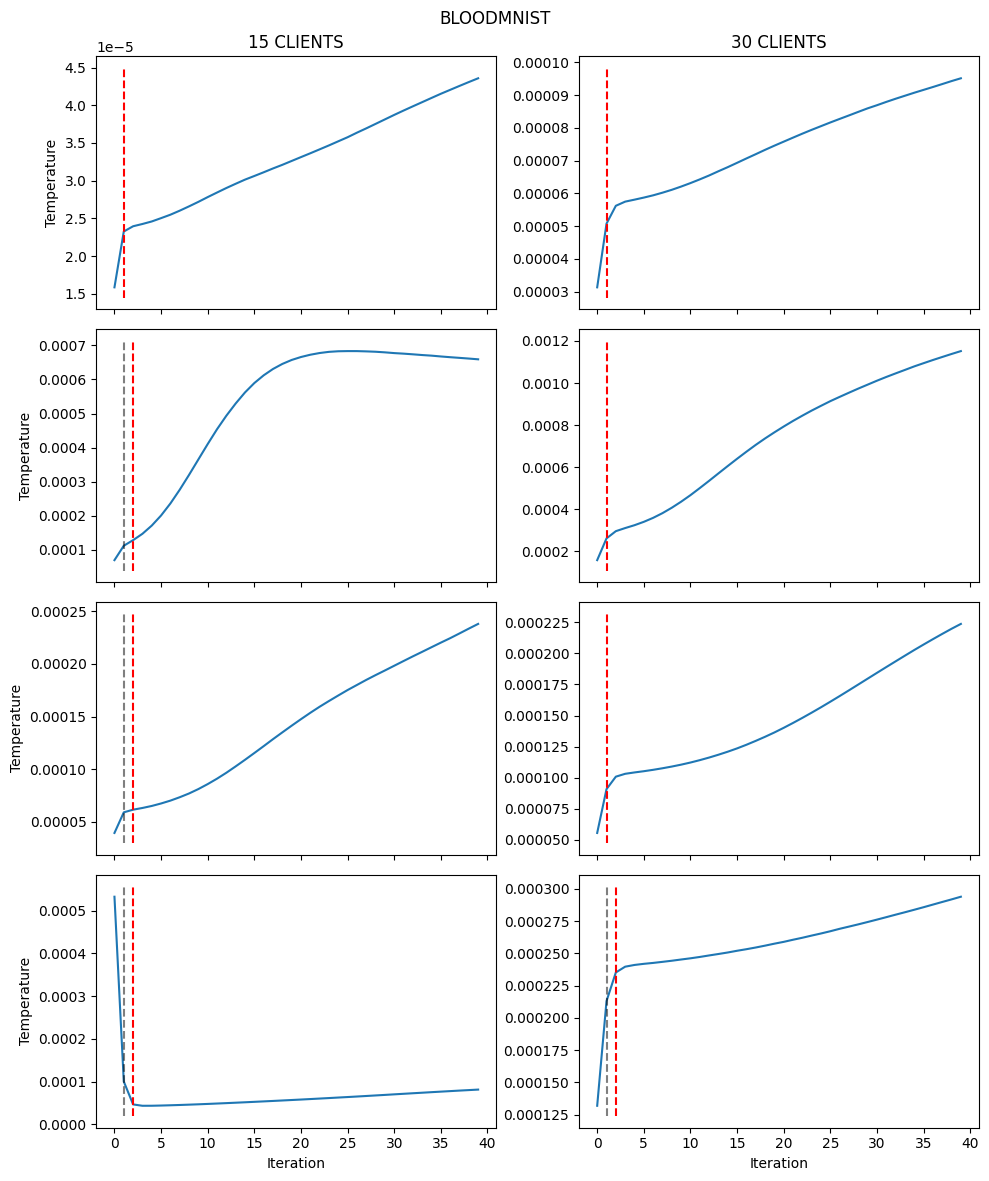

In [11]:
fig, axes = plt.subplots(4, 2, figsize=FIGSIZE, sharey=False, sharex=True)
round_cutoff = 40

axes[0][0].set_title("15 CLIENTS")
axes[0][0].plot(registered_temperature['BLOODMNIST_overlaping_balanced_15'][:round_cutoff])
axes[1][0].plot(registered_temperature['BLOODMNIST_overlaping_imbalanced_15'][:round_cutoff])
axes[2][0].plot(registered_temperature['BLOODMNIST_nonoverlaping_balanced_15']['temperature'][:round_cutoff])
axes[3][0].plot(registered_temperature['BLOODMNIST_nonoverlaping_imbalanced_15']['temperature'][:round_cutoff])

axes[0][1].set_title("30 CLIENTS")
axes[0][1].plot(registered_temperature['BLOODMNIST_overlaping_balanced_30'][:round_cutoff])
axes[1][1].plot(registered_temperature['BLOODMNIST_overlaping_imbalanced_30'][:round_cutoff])
axes[2][1].plot(registered_temperature['BLOODMNIST_nonoverlaping_balanced_30']['temperature'][:round_cutoff])
axes[3][1].plot(registered_temperature['BLOODMNIST_nonoverlaping_imbalanced_30']['temperature'][:round_cutoff])

# Plots clustering moment
ymin, ymax = axes[0][0].get_ylim()
axes[0][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed', label='Clustering Iteration')

ymin, ymax = axes[1][0].get_ylim()
axes[1][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[1][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5, label='Local Minima Prior to Clustering')

ymin, ymax = axes[2][0].get_ylim()
axes[2][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[2][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

ymin, ymax = axes[3][0].get_ylim()
axes[3][0].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][0].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

ymin, ymax = axes[0][1].get_ylim()
axes[0][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

ymin, ymax = axes[1][1].get_ylim()
axes[1][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

ymin, ymax = axes[2][1].get_ylim()
axes[2][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')

ymin, ymax = axes[3][1].get_ylim()
axes[3][1].vlines(x=2, ymin=ymin, ymax=ymax, colors='red', linestyles='dashed')
axes[3][1].vlines(x=1, ymin=ymin, ymax=ymax, colors='black', linestyles='dashed', alpha=0.5)

axes[3][0].set_xlabel('Iteration')
axes[3][1].set_xlabel('Iteration')
for a in range(4):
    axes[a][0].set_ylabel('Temperature')
fig.suptitle("BLOODMNIST")
fig.tight_layout()

## Seciton 2: Averaged Across Runs

### Section 2.1: Averaged per Dataset

In [13]:
# Stacking frames
frames = [registered_temperature['MNIST_overlaping_balanced_15'], 
          registered_temperature['MNIST_overlaping_imbalanced_15'], 
          registered_temperature['MNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['MNIST_nonoverlaping_imbalanced_15']['temperature']]
mnist_15_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature['MNIST_overlaping_balanced_30'], 
          registered_temperature['MNIST_overlaping_imbalanced_30'], 
          registered_temperature['MNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['MNIST_nonoverlaping_imbalanced_30']['temperature']]
mnist_30_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature['FMNIST_overlaping_balanced_15'], 
          registered_temperature['FMNIST_overlaping_imbalanced_15'], 
          registered_temperature['FMNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['FMNIST_nonoverlaping_imbalanced_15']['temperature']]
fmnist_15_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature['FMNIST_overlaping_balanced_30'], 
          registered_temperature['FMNIST_overlaping_imbalanced_30'], 
          registered_temperature['FMNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['FMNIST_nonoverlaping_imbalanced_30']['temperature']]
fmnist_30_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature['CIFAR10_overlaping_balanced_15'], 
          registered_temperature['CIFAR10_overlaping_imbalanced_15'], 
          registered_temperature['CIFAR10_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['CIFAR10_nonoverlaping_imbalanced_15']['temperature']]
cifar10_15_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature['CIFAR10_overlaping_balanced_30'], 
          registered_temperature['CIFAR10_overlaping_imbalanced_30'], 
          registered_temperature['CIFAR10_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['CIFAR10_nonoverlaping_imbalanced_30']['temperature']]
cifar10_30_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature['PATHMNIST_overlaping_balanced_15'], 
          registered_temperature['PATHMNIST_overlaping_imbalanced_15'], 
          registered_temperature['PATHMNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['PATHMNIST_nonoverlaping_imbalanced_15']['temperature']]
pathmnist_15_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature['PATHMNIST_overlaping_balanced_30'], 
          registered_temperature['PATHMNIST_overlaping_imbalanced_30'], 
          registered_temperature['PATHMNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['PATHMNIST_nonoverlaping_imbalanced_30']['temperature']]
pathmnist_30_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature['BLOODMNIST_nonoverlaping_balanced_15'], 
          registered_temperature['BLOODMNIST_overlaping_imbalanced_15'], 
          registered_temperature['BLOODMNIST_overlaping_balanced_15']['temperature'], 
          registered_temperature['BLOODMNIST_overlaping_imbalanced_15']['temperature']]
bloodmnist_15_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature['BLOODMNIST_nonoverlaping_balanced_30'], 
          registered_temperature['BLOODMNIST_overlaping_imbalanced_30'], 
          registered_temperature['BLOODMNIST_overlaping_balanced_30']['temperature'], 
          registered_temperature['BLOODMNIST_overlaping_imbalanced_30']['temperature']]
bloodmnist_30_stacked = pd.concat(frames, axis=1)

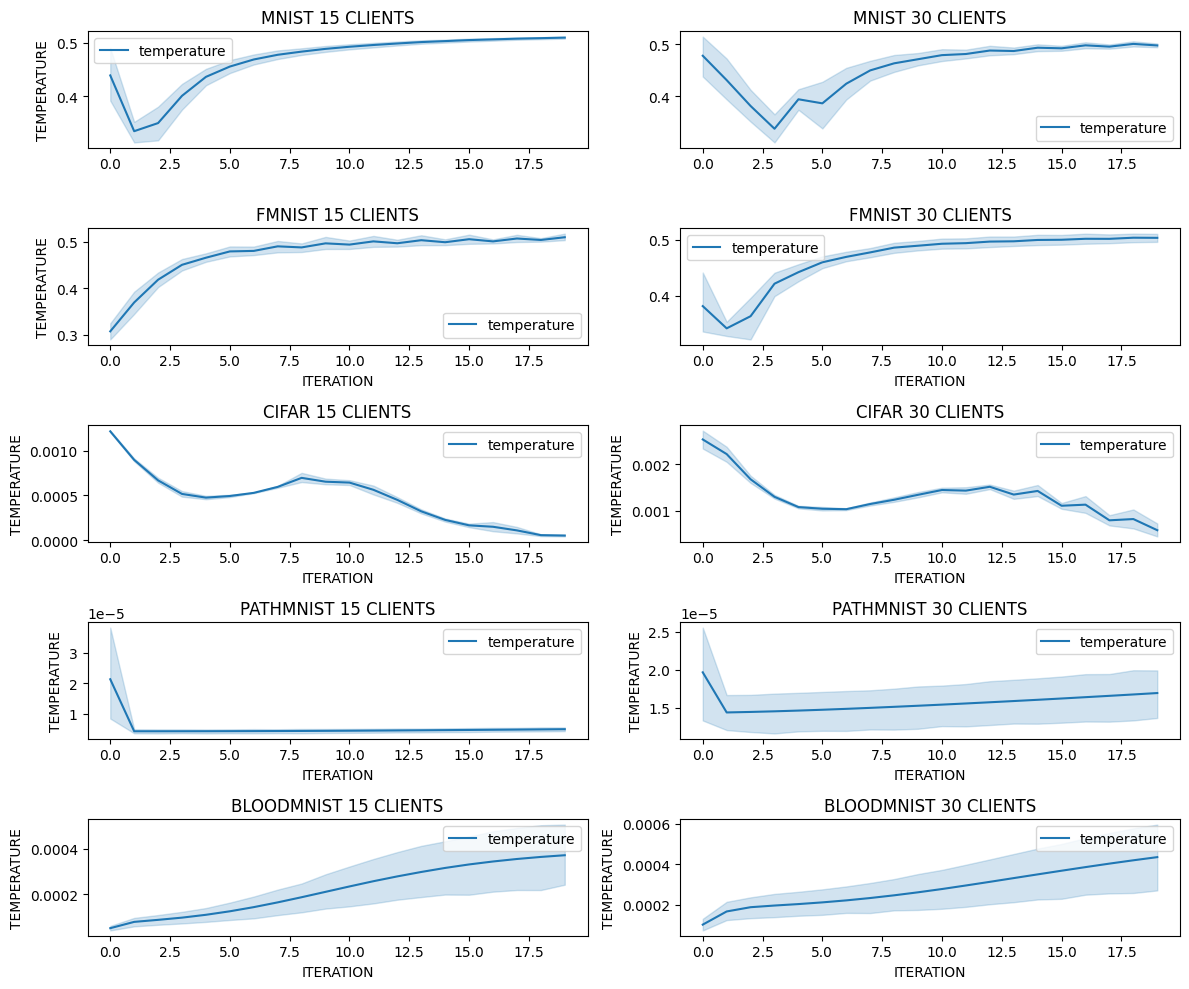

In [17]:
fig, axes = plt.subplots(5, 2, figsize=(12, 10))

# Mnist 15 stakced
sns.lineplot(mnist_15_stacked[:20], ax=axes[0][0])
axes[0][0].set_title('MNIST 15 CLIENTS')
axes[0][0].set_ylabel("TEMPERATURE")

# MNIST 30 stakced
sns.lineplot(mnist_30_stacked[:20], ax=axes[0][1])
axes[0][1].set_title("MNIST 30 CLIENTS")

# FMNIST 15 stacked
sns.lineplot(fmnist_15_stacked[:20], ax=axes[1][0])
axes[1][0].set_title("FMNIST 15 CLIENTS")
axes[1][0].set_ylabel("TEMPERATURE")
axes[1][0].set_xlabel("ITERATION")

# FNIST 30 stacked
sns.lineplot(fmnist_30_stacked[:20], ax=axes[1][1])
axes[1][1].set_title("FMNIST 30 CLIENTS")
axes[1][1].set_xlabel("ITERATION")

# CIFAR 15 stacked
sns.lineplot(cifar10_15_stacked[:20], ax=axes[2][0])
axes[2][0].set_title("CIFAR 15 CLIENTS")
axes[2][0].set_ylabel("TEMPERATURE")
axes[2][0].set_xlabel("ITERATION")

# CIFAR 30 stacked
sns.lineplot(cifar10_30_stacked[:20], ax=axes[2][1])
axes[2][1].set_title("CIFAR 30 CLIENTS")
axes[2][1].set_ylabel("TEMPERATURE")
axes[2][1].set_xlabel("ITERATION")

# PATHMNIST 15 stacked
sns.lineplot(pathmnist_15_stacked[:20], ax=axes[3][0])
axes[3][0].set_title("PATHMNIST 15 CLIENTS")
axes[3][0].set_ylabel("TEMPERATURE")
axes[3][0].set_xlabel("ITERATION")

# PATHMNIST 30 stacked
sns.lineplot(pathmnist_30_stacked[:20], ax=axes[3][1])
axes[3][1].set_title("PATHMNIST 30 CLIENTS")
axes[3][1].set_ylabel("TEMPERATURE")
axes[3][1].set_xlabel("ITERATION")

# BLOODMNIST 15 stacked
sns.lineplot(bloodmnist_15_stacked[:20], ax=axes[4][0])
axes[4][0].set_title("BLOODMNIST 15 CLIENTS")
axes[4][0].set_ylabel("TEMPERATURE")
axes[4][0].set_xlabel("ITERATION")

# BLOODMNIST 30 stacked
sns.lineplot(bloodmnist_30_stacked[:20], ax=axes[4][1])
axes[4][1].set_title("BLOODMNIST 30 CLIENTS")
axes[4][1].set_ylabel("TEMPERATURE")
axes[4][1].set_xlabel("ITERATION")

plt.tight_layout()

### Section 2.2: Averages across all datasets.

In [18]:
# Stacking frames
frames = [registered_temperature['MNIST_overlaping_balanced_15'], 
          registered_temperature['MNIST_overlaping_imbalanced_15'], 
          registered_temperature['MNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['MNIST_nonoverlaping_imbalanced_15']['temperature'],
          registered_temperature['FMNIST_overlaping_balanced_15'], 
          registered_temperature['FMNIST_overlaping_imbalanced_15'], 
          registered_temperature['FMNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['FMNIST_nonoverlaping_imbalanced_15']['temperature'],
          registered_temperature['CIFAR10_overlaping_balanced_15'], 
          registered_temperature['CIFAR10_overlaping_imbalanced_15'], 
          registered_temperature['CIFAR10_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['CIFAR10_nonoverlaping_imbalanced_15']['temperature'],
          registered_temperature['PATHMNIST_overlaping_balanced_15'], 
          registered_temperature['PATHMNIST_overlaping_imbalanced_15'], 
          registered_temperature['PATHMNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['PATHMNIST_nonoverlaping_imbalanced_15']['temperature'],
          registered_temperature['BLOODMNIST_overlaping_balanced_15'], 
          registered_temperature['BLOODMNIST_overlaping_imbalanced_15'], 
          registered_temperature['BLOODMNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['BLOODMNIST_nonoverlaping_imbalanced_15']['temperature']]
temperature_15_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature['MNIST_overlaping_balanced_30'], 
          registered_temperature['MNIST_overlaping_imbalanced_30'], 
          registered_temperature['MNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['MNIST_nonoverlaping_imbalanced_30']['temperature'],
          registered_temperature['FMNIST_overlaping_balanced_30'], 
          registered_temperature['FMNIST_overlaping_imbalanced_30'], 
          registered_temperature['FMNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['FMNIST_nonoverlaping_imbalanced_30']['temperature'],
          registered_temperature['CIFAR10_overlaping_balanced_30'], 
          registered_temperature['CIFAR10_overlaping_imbalanced_30'], 
          registered_temperature['CIFAR10_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['CIFAR10_nonoverlaping_imbalanced_30']['temperature'],
          registered_temperature['PATHMNIST_overlaping_balanced_30'], 
          registered_temperature['PATHMNIST_overlaping_imbalanced_30'], 
          registered_temperature['PATHMNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['PATHMNIST_nonoverlaping_imbalanced_30']['temperature'],
          registered_temperature['BLOODMNIST_overlaping_balanced_30'], 
          registered_temperature['BLOODMNIST_overlaping_imbalanced_30'], 
          registered_temperature['BLOODMNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['BLOODMNIST_nonoverlaping_imbalanced_30']['temperature']]
temperature_30_stacked = pd.concat(frames, axis=1)

In [19]:
temperature_15_stacked

,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature
0,0.599499,0.377581,0.435321,0.344040,0.263702,0.291140,0.357119,0.316594,0.001206,0.001202,0.001207,0.001244,0.000002,0.000005,0.000005,0.000073,0.000016,0.000069,0.000039,0.000533
1,0.387896,0.275671,0.332269,0.341665,0.309721,0.336469,0.414156,0.417091,0.000859,0.000868,0.000911,0.000947,0.000002,0.000004,0.000005,0.000006,0.000023,0.000112,0.000059,0.000100
2,0.247865,0.335889,0.393808,0.420956,0.368536,0.407750,0.442751,0.454487,0.000624,0.000620,0.000665,0.000761,0.000002,0.000004,0.000005,0.000006,0.000024,0.000128,0.000062,0.000047
3,0.323085,0.392294,0.434151,0.453792,0.418221,0.437489,0.461262,0.484791,0.000468,0.000468,0.000511,0.000616,0.000002,0.000004,0.000005,0.000006,0.000024,0.000147,0.000063,0.000044
4,0.387157,0.426477,0.457337,0.474682,0.439036,0.457735,0.479998,0.486148,0.000441,0.000447,0.000471,0.000539,0.000002,0.000004,0.000005,0.000006,0.000025,0.000171,0.000065,0.000044
5,0.419469,0.447409,0.472384,0.483853,0.446387,0.469374,0.491875,0.509543,0.000466,0.000478,0.000492,0.000534,0.000002,0.000004,0.000005,0.000006,0.000025,0.000201,0.000067,0.000044
6,0.442025,0.460325,0.482051,0.491834,0.450979,0.474908,0.501407,0.494328,0.000534,0.000517,0.000526,0.000534,0.000002,0.000004,0.000005,0.000006,0.000025,0.000236,0.000070,0.000045
7,0.455564,0.470122,0.489072,0.496718,0.454566,0.479164,0.502972,0.524205,0.000625,0.000563,0.000599,0.000590,0.000002,0.000004,0.000005,0.000006,0.000026,0.000276,0.000073,0.000045
8,0.465698,0.477142,0.493160,0.499235,0.459153,0.481098,0.508490,0.502908,0.000705,0.000625,0.000855,0.000596,0.000002,0.000004,0.000005,0.000006,0.000027,0.000320,0.000077,0.000046
9,0.473194,0.483205,0.497456,0.502068,0.463045,0.483185,0.506910,0.533535,0.000762,0.000626,0.000620,0.000602,0.000002,0.000004,0.000005,0.000006,0.000027,0.000365,0.000081,0.000047


<Axes: >

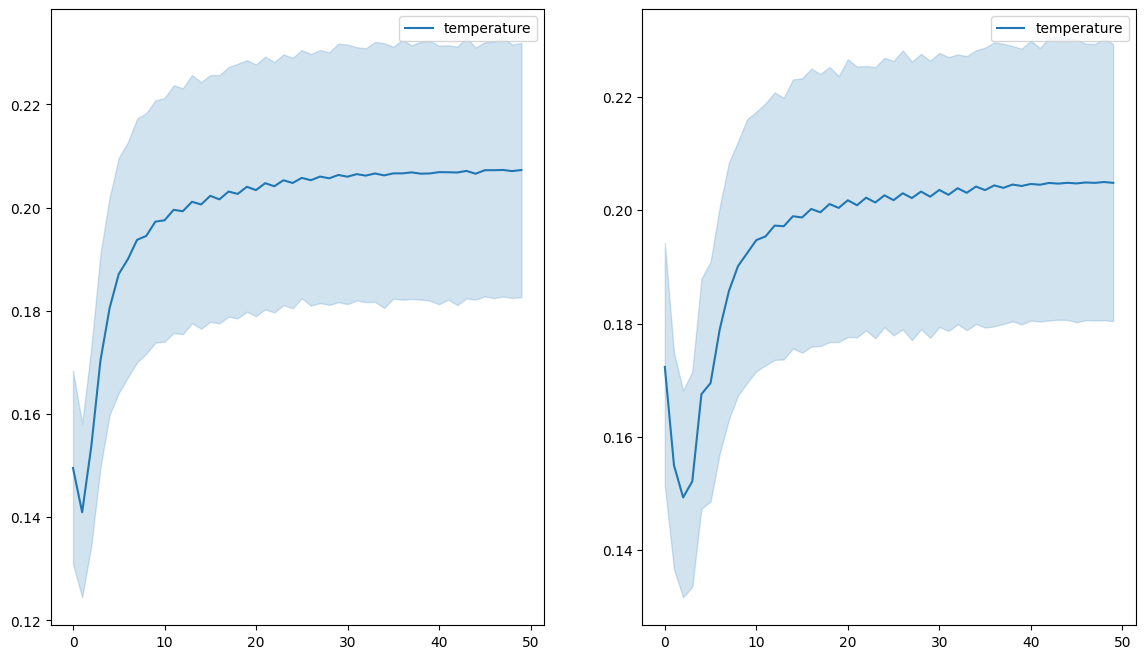

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

sns.lineplot(temperature_15_stacked, ax=axes[0], n_boot=5000, err_style='band')
sns.lineplot(temperature_30_stacked, ax=axes[1], n_boot=5000, err_style='band')

<Axes: >

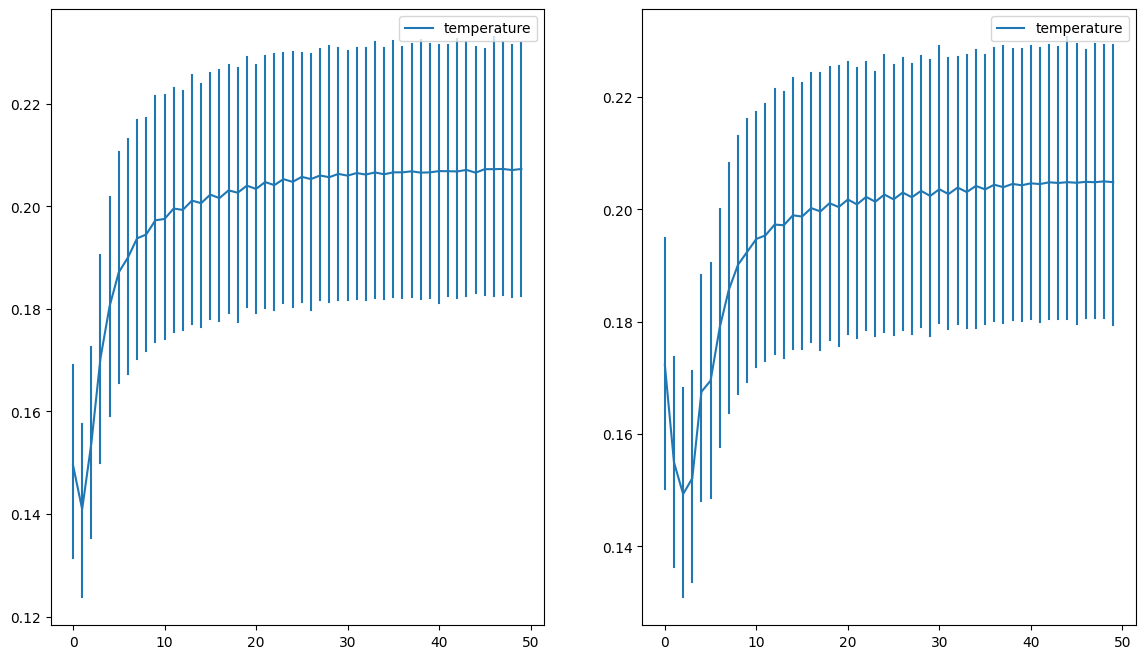

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

sns.lineplot(temperature_15_stacked, ax=axes[0], n_boot=5000, err_style='bars')
sns.lineplot(temperature_30_stacked, ax=axes[1], n_boot=5000, err_style='bars')

<!-- ## Stage 3: Distinction Between FullSized ResNet and Adjusted ResNet -->

## Seciton 3: Averaged Across Runs (Normalized)

### Section 3.1: Averaged per Dataset

In [22]:
mnist_15_stacked_normalized = (mnist_15_stacked - mnist_15_stacked.min()) / (mnist_15_stacked.max() - mnist_15_stacked.min())
mnist_30_stacked_normalized = (mnist_30_stacked - mnist_30_stacked.min()) / (mnist_30_stacked.max() - mnist_30_stacked.min())
fmnist_15_stacked_normalized = (fmnist_15_stacked - fmnist_15_stacked.min()) / (fmnist_15_stacked.max() - fmnist_15_stacked.min())
fmnist_30_stacked_normalized = (fmnist_30_stacked - fmnist_30_stacked.min()) / (fmnist_30_stacked.max() - fmnist_30_stacked.min())
cifar10_15_stacked_normalized = (cifar10_15_stacked - cifar10_15_stacked.min()) / (cifar10_15_stacked.max() - cifar10_15_stacked.min())
cifar10_30_stacked_normalized = (cifar10_30_stacked - cifar10_30_stacked.min()) / (cifar10_30_stacked.max() - cifar10_30_stacked.min())
pathmnist_15_stacked_normalized = (pathmnist_15_stacked - pathmnist_15_stacked.min()) / (pathmnist_15_stacked.max() - pathmnist_15_stacked.min())
pathmnist_30_stacked_normalized = (pathmnist_30_stacked - pathmnist_30_stacked.min()) / (pathmnist_30_stacked.max() - pathmnist_30_stacked.min())
bloodmnist_15_stacked_normalized = (bloodmnist_15_stacked - bloodmnist_15_stacked.min()) / (bloodmnist_15_stacked.max() - bloodmnist_15_stacked.min())
bloodmnist_30_stacked_normalized = (bloodmnist_30_stacked - bloodmnist_30_stacked.min()) / (bloodmnist_30_stacked.max() - bloodmnist_30_stacked.min())

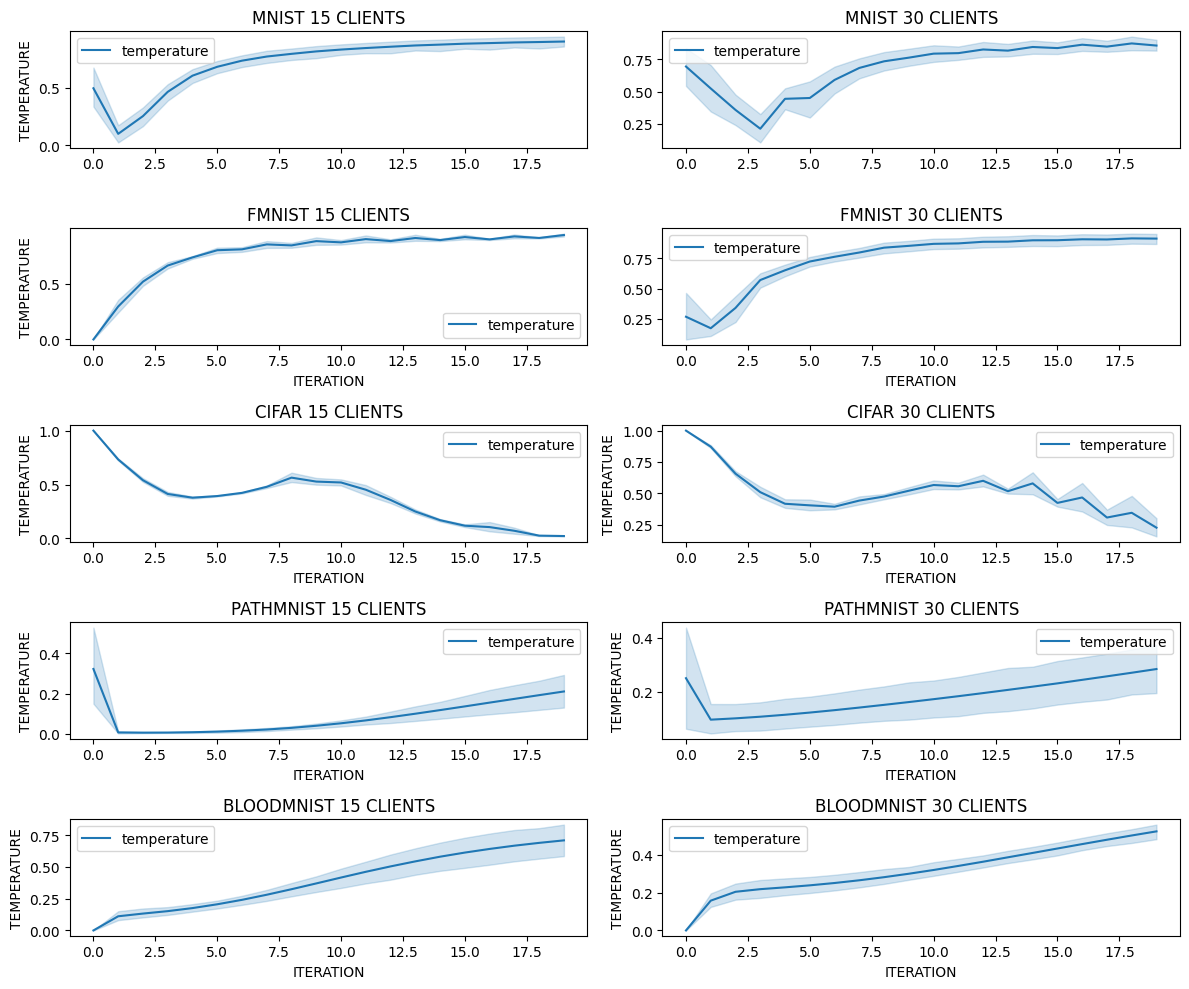

In [25]:
fig, axes = plt.subplots(5, 2, figsize=(12, 10))

# Mnist 15 stakced
sns.lineplot(mnist_15_stacked_normalized[:20], ax=axes[0][0])
axes[0][0].set_title('MNIST 15 CLIENTS')
axes[0][0].set_ylabel("TEMPERATURE")

# MNIST 30 stakced
sns.lineplot(mnist_30_stacked_normalized[:20], ax=axes[0][1])
axes[0][1].set_title("MNIST 30 CLIENTS")

# FMNIST 15 stacked
sns.lineplot(fmnist_15_stacked_normalized[:20], ax=axes[1][0])
axes[1][0].set_title("FMNIST 15 CLIENTS")
axes[1][0].set_ylabel("TEMPERATURE")
axes[1][0].set_xlabel("ITERATION")

# FNIST 30 stacked
sns.lineplot(fmnist_30_stacked_normalized[:20], ax=axes[1][1])
axes[1][1].set_title("FMNIST 30 CLIENTS")
axes[1][1].set_xlabel("ITERATION")

# CIFAR 15 stacked
sns.lineplot(cifar10_15_stacked_normalized[:20], ax=axes[2][0])
axes[2][0].set_title("CIFAR 15 CLIENTS")
axes[2][0].set_ylabel("TEMPERATURE")
axes[2][0].set_xlabel("ITERATION")

# CIFAR 30 stacked
sns.lineplot(cifar10_30_stacked_normalized[:20], ax=axes[2][1])
axes[2][1].set_title("CIFAR 30 CLIENTS")
axes[2][1].set_ylabel("TEMPERATURE")
axes[2][1].set_xlabel("ITERATION")

# PATHMNIST 15 stacked
sns.lineplot(pathmnist_15_stacked_normalized[:20], ax=axes[3][0])
axes[3][0].set_title("PATHMNIST 15 CLIENTS")
axes[3][0].set_ylabel("TEMPERATURE")
axes[3][0].set_xlabel("ITERATION")

# PATHMNIST 30 stacked
sns.lineplot(pathmnist_30_stacked_normalized[:20], ax=axes[3][1])
axes[3][1].set_title("PATHMNIST 30 CLIENTS")
axes[3][1].set_ylabel("TEMPERATURE")
axes[3][1].set_xlabel("ITERATION")

# BLOODMNIST 15 stacked
sns.lineplot(bloodmnist_15_stacked_normalized[:20], ax=axes[4][0])
axes[4][0].set_title("BLOODMNIST 15 CLIENTS")
axes[4][0].set_ylabel("TEMPERATURE")
axes[4][0].set_xlabel("ITERATION")

# BLOODMNIST 30 stacked
sns.lineplot(bloodmnist_30_stacked_normalized[:20], ax=axes[4][1])
axes[4][1].set_title("BLOODMNIST 30 CLIENTS")
axes[4][1].set_ylabel("TEMPERATURE")
axes[4][1].set_xlabel("ITERATION")

plt.tight_layout()

### Section 3.2: Averaged per all Datasets

In [26]:
# Stacking frames
frames = [registered_temperature['MNIST_overlaping_balanced_15'], 
          registered_temperature['MNIST_overlaping_imbalanced_15'], 
          registered_temperature['MNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['MNIST_nonoverlaping_imbalanced_15']['temperature'],
          registered_temperature['FMNIST_overlaping_balanced_15'], 
          registered_temperature['FMNIST_overlaping_imbalanced_15'], 
          registered_temperature['FMNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['FMNIST_nonoverlaping_imbalanced_15']['temperature'],
          registered_temperature['CIFAR10_overlaping_balanced_15'], 
          registered_temperature['CIFAR10_overlaping_imbalanced_15'], 
          registered_temperature['CIFAR10_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['CIFAR10_nonoverlaping_imbalanced_15']['temperature'],
          registered_temperature['PATHMNIST_overlaping_balanced_15'], 
          registered_temperature['PATHMNIST_overlaping_imbalanced_15'], 
          registered_temperature['PATHMNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['PATHMNIST_nonoverlaping_imbalanced_15']['temperature'],
          registered_temperature['BLOODMNIST_overlaping_balanced_15'], 
          registered_temperature['BLOODMNIST_overlaping_imbalanced_15'], 
          registered_temperature['BLOODMNIST_nonoverlaping_balanced_15']['temperature'], 
          registered_temperature['BLOODMNIST_nonoverlaping_imbalanced_15']['temperature']]
temperature_15_stacked = pd.concat(frames, axis=1)

frames = [registered_temperature['MNIST_overlaping_balanced_30'], 
          registered_temperature['MNIST_overlaping_imbalanced_30'], 
          registered_temperature['MNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['MNIST_nonoverlaping_imbalanced_30']['temperature'],
          registered_temperature['FMNIST_overlaping_balanced_30'], 
          registered_temperature['FMNIST_overlaping_imbalanced_30'], 
          registered_temperature['FMNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['FMNIST_nonoverlaping_imbalanced_30']['temperature'],
          registered_temperature['CIFAR10_overlaping_balanced_30'], 
          registered_temperature['CIFAR10_overlaping_imbalanced_30'], 
          registered_temperature['CIFAR10_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['CIFAR10_nonoverlaping_imbalanced_30']['temperature'],
          registered_temperature['PATHMNIST_overlaping_balanced_30'], 
          registered_temperature['PATHMNIST_overlaping_imbalanced_30'], 
          registered_temperature['PATHMNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['PATHMNIST_nonoverlaping_imbalanced_30']['temperature'],
          registered_temperature['BLOODMNIST_overlaping_balanced_30'], 
          registered_temperature['BLOODMNIST_overlaping_imbalanced_30'], 
          registered_temperature['BLOODMNIST_nonoverlaping_balanced_30']['temperature'], 
          registered_temperature['BLOODMNIST_nonoverlaping_imbalanced_30']['temperature']]
temperature_30_stacked = pd.concat(frames, axis=1)

temperature_15_stacked_normalized = (temperature_15_stacked - temperature_15_stacked.min()) / (temperature_15_stacked.max() - temperature_15_stacked.min())
temperature_30_stacked_normalized = (temperature_30_stacked - temperature_30_stacked.min()) / (temperature_30_stacked.max() - temperature_30_stacked.min())

In [27]:
temperature_15_stacked_normalized

,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature,temperature
0,1.000000,0.423195,0.548101,0.013120,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.022144,0.190606,0.078060,1.000000,0.000000,0.000000,0.000000,1.000000
1,0.398231,0.000000,0.000000,0.000000,0.183211,0.200658,0.344044,0.453446,0.711106,0.718452,0.748575,0.751964,0.026327,0.000000,0.000000,0.000142,0.231453,0.068919,0.076736,0.115889
2,0.000000,0.250063,0.327311,0.438162,0.417365,0.516198,0.516524,0.622180,0.514762,0.509231,0.539672,0.597013,0.014291,0.002882,0.005076,0.000019,0.253194,0.095657,0.086556,0.006435
3,0.213916,0.484293,0.541882,0.619610,0.615168,0.647847,0.628184,0.758912,0.385302,0.381570,0.408657,0.475237,0.006330,0.007418,0.010387,0.000000,0.262619,0.126080,0.092942,0.000000
4,0.396128,0.626245,0.665198,0.735051,0.698040,0.737471,0.741195,0.765035,0.362720,0.363391,0.375380,0.411357,0.001530,0.013190,0.016026,0.000098,0.273092,0.165305,0.100427,0.000137
5,0.488019,0.713169,0.745231,0.785729,0.727305,0.788992,0.812841,0.870594,0.383412,0.389800,0.393254,0.407539,0.000000,0.020759,0.021741,0.000289,0.286893,0.213681,0.109686,0.001126
6,0.552165,0.766803,0.796646,0.829830,0.745585,0.813490,0.870338,0.801942,0.440061,0.422592,0.421768,0.407617,0.003225,0.029837,0.027348,0.000559,0.301136,0.271236,0.120300,0.002376
7,0.590670,0.807488,0.833991,0.856821,0.759865,0.832331,0.879772,0.936749,0.516146,0.461361,0.484155,0.454249,0.010477,0.040119,0.033058,0.000879,0.317847,0.336956,0.132910,0.003772
8,0.619488,0.836637,0.855735,0.870727,0.778128,0.840890,0.913057,0.840657,0.582174,0.513619,0.701563,0.458895,0.025829,0.052086,0.038602,0.001262,0.335766,0.408045,0.146926,0.005370
9,0.640807,0.861816,0.878584,0.886381,0.793624,0.850129,0.903529,0.978843,0.630202,0.514151,0.501666,0.464073,0.048545,0.065515,0.043890,0.001679,0.354405,0.481836,0.163309,0.007020


<Axes: >

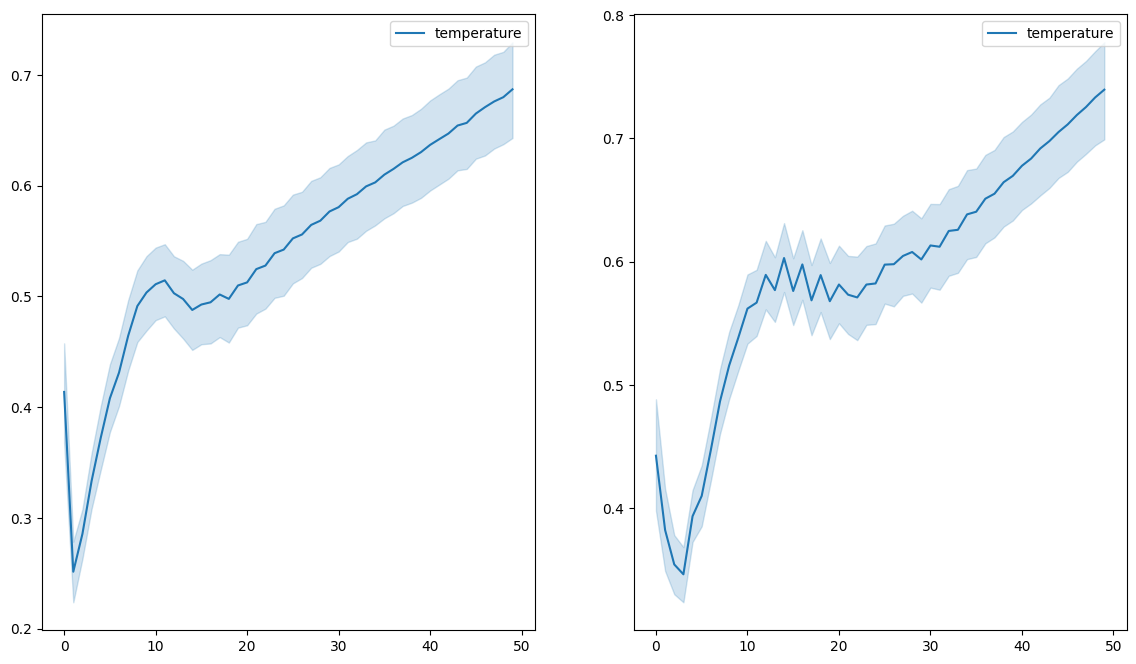

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

sns.lineplot(temperature_15_stacked_normalized, ax=axes[0], n_boot=5000, err_style='band')
sns.lineplot(temperature_30_stacked_normalized, ax=axes[1], n_boot=5000, err_style='band')

<Axes: >

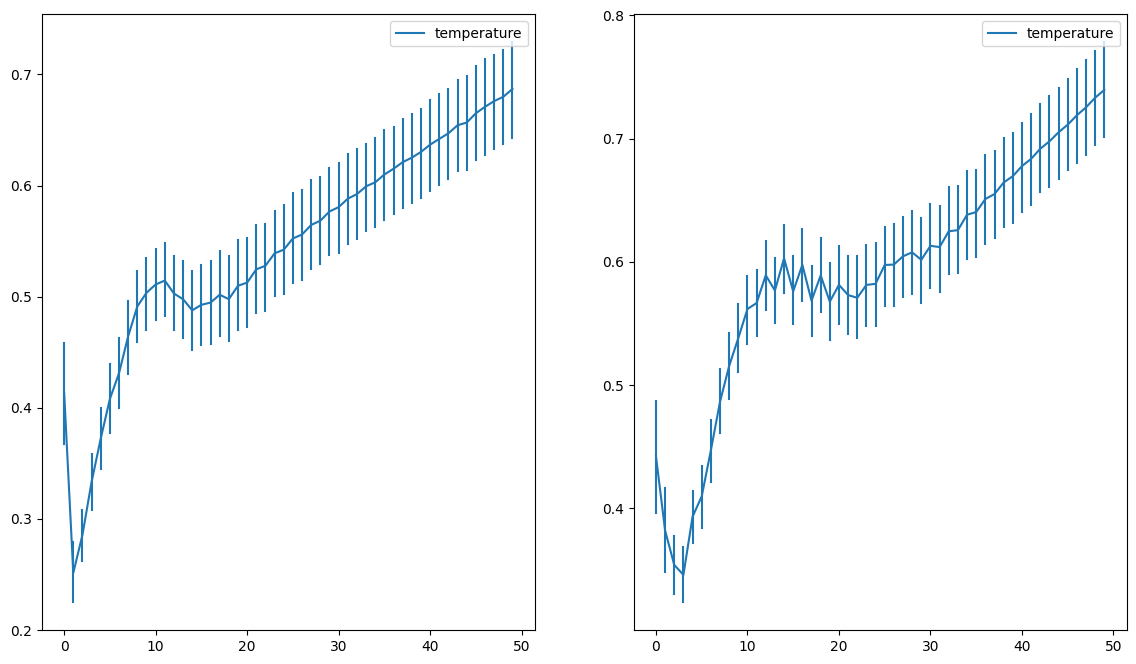

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

sns.lineplot(temperature_15_stacked_normalized, ax=axes[0], n_boot=5000, err_style='bars')
sns.lineplot(temperature_30_stacked_normalized, ax=axes[1], n_boot=5000, err_style='bars')

In [29]:
# # Root directory for an experiment
# ROOT = os.path.join(os.getcwd(), 'temperature_experiments')
# # Available datasets
# datasets = ['MNIST', 'FMNIST', 'CIFAR10', 'PATHMNIST_FULLSIZE']
# # Number of clients
# no_of_clients = ['15', '30']
# # Types of splits in terms of overlap
# split_types = ['nonoverlaping', 'overlaping']
# # Types of splits in terms of balance
# split_balance = ['balanced', 'imbalanced']

In [30]:
# registered_temperature = {}
# # All the datasets except TISSUEMNIST
# for dataset in datasets:
#     for type in split_types:
#         for balance in split_balance:
#             for no in no_of_clients:
#                 path = os.path.join(ROOT, dataset, type, balance, no)
#                 dir_name = f"{dataset}_{type}_{balance}_{no}"
#                 registered_temperature[dir_name] = pd.read_csv(os.path.join(ROOT, dataset, type, balance, no, \
#                     dir_name, 'results', 'clusters_temperature.csv'), names=['temperature'], index_col=0)
                
# # Tissue mnist
# dataset = 'TISSUEMNIST_FULLSIZE'
# no = '15'
# for type in split_types:
#     for balance in split_balance:
#         path = os.path.join(ROOT, dataset, type, balance, no)
#         dir_name = f"{dataset}_{type}_{balance}_{no}"
#         registered_temperature[dir_name] = pd.read_csv(os.path.join(ROOT, dataset, type, balance, no, \
#             dir_name, 'results', 'clusters_temperature.csv'), names=['temperature'], index_col=0)

In [31]:
# fig, axes = plt.subplots(4, 2, figsize=FIGSIZE, sharey=True, sharex=True)
# round_cutoff = 20

# axes[0][0].set_title("15 CLIENTS")
# axes[0][0].plot(registered_temperature['MNIST_overlaping_balanced_15'][:round_cutoff])
# axes[1][0].plot(registered_temperature['MNIST_overlaping_imbalanced_15'][:round_cutoff])
# axes[2][0].plot(registered_temperature['MNIST_nonoverlaping_balanced_15']['temperature'][:round_cutoff])
# axes[3][0].plot(registered_temperature['MNIST_nonoverlaping_imbalanced_15']['temperature'][:round_cutoff])

# axes[0][1].set_title("30 CLIENTS")
# axes[0][1].plot(registered_temperature['MNIST_overlaping_balanced_30'][:round_cutoff])
# axes[1][1].plot(registered_temperature['MNIST_overlaping_imbalanced_30'][:round_cutoff])
# axes[2][1].plot(registered_temperature['MNIST_nonoverlaping_balanced_30']['temperature'][:round_cutoff])
# axes[3][1].plot(registered_temperature['MNIST_nonoverlaping_imbalanced_30']['temperature'][:round_cutoff])

# axes[3][0].set_xlabel('Iteration')
# axes[3][1].set_xlabel('Iteration')
# for a in range(4):
#     axes[a][0].set_ylabel('Temperature')
# fig.suptitle("MNIST")
# fig.tight_layout()

In [32]:
# fig, axes = plt.subplots(4, 2, figsize=FIGSIZE, sharey=True, sharex=True)
# round_cutoff = 20


# axes[0][0].set_title("15 CLIENTS")
# axes[0][0].plot(registered_temperature['FMNIST_overlaping_balanced_15'][:round_cutoff])
# axes[1][0].plot(registered_temperature['FMNIST_overlaping_imbalanced_15'][:round_cutoff])
# axes[2][0].plot(registered_temperature['FMNIST_nonoverlaping_balanced_15']['temperature'][:round_cutoff])
# axes[3][0].plot(registered_temperature['FMNIST_nonoverlaping_imbalanced_15']['temperature'][:round_cutoff])

# axes[0][1].set_title("30 CLIENTS")
# axes[0][1].plot(registered_temperature['FMNIST_overlaping_balanced_30'][:round_cutoff])
# axes[1][1].plot(registered_temperature['FMNIST_overlaping_imbalanced_30'][:round_cutoff])
# axes[2][1].plot(registered_temperature['FMNIST_nonoverlaping_balanced_30']['temperature'][:round_cutoff])
# axes[3][1].plot(registered_temperature['FMNIST_nonoverlaping_imbalanced_30']['temperature'][:round_cutoff])

# axes[3][0].set_xlabel('Iteration')
# axes[3][1].set_xlabel('Iteration')
# for a in range(4):
#     axes[a][0].set_ylabel('Temperature')
# fig.suptitle("FMNIST")
# fig.tight_layout()

In [33]:
# fig, axes = plt.subplots(4, 2, figsize=FIGSIZE, sharey=True, sharex=True)
# round_cutoff = 40

# axes[0][0].set_title("15 CLIENTS")
# axes[0][0].plot(registered_temperature['CIFAR10_overlaping_balanced_15'][:round_cutoff])
# axes[1][0].plot(registered_temperature['CIFAR10_overlaping_imbalanced_15'][:round_cutoff])
# axes[2][0].plot(registered_temperature['CIFAR10_nonoverlaping_balanced_15']['temperature'][:round_cutoff])
# axes[3][0].plot(registered_temperature['CIFAR10_nonoverlaping_imbalanced_15']['temperature'][:round_cutoff])

# axes[0][1].set_title("30 CLIENTS")
# axes[0][1].plot(registered_temperature['CIFAR10_overlaping_balanced_30'][:round_cutoff])
# axes[1][1].plot(registered_temperature['CIFAR10_overlaping_imbalanced_30'][:round_cutoff])
# axes[2][1].plot(registered_temperature['CIFAR10_nonoverlaping_balanced_30']['temperature'][:round_cutoff])
# axes[3][1].plot(registered_temperature['CIFAR10_nonoverlaping_imbalanced_30']['temperature'][:round_cutoff])

# axes[3][0].set_xlabel('Iteration')
# axes[3][1].set_xlabel('Iteration')
# for a in range(4):
#     axes[a][0].set_ylabel('Temperature')
# fig.suptitle("CIFAR10")
# fig.tight_layout()

In [34]:
# fig, axes = plt.subplots(4, 2, figsize=FIGSIZE, sharey=True, sharex=True)
# round_cutoff = 40

# axes[0][0].set_title("15 CLIENTS")
# axes[0][0].plot(registered_temperature['PATHMNIST_FULLSIZE_overlaping_balanced_15'][:round_cutoff])
# axes[1][0].plot(registered_temperature['PATHMNIST_FULLSIZE_overlaping_imbalanced_15'][:round_cutoff])
# axes[2][0].plot(registered_temperature['PATHMNIST_FULLSIZE_nonoverlaping_balanced_15']['temperature'][:round_cutoff])
# axes[3][0].plot(registered_temperature['PATHMNIST_FULLSIZE_nonoverlaping_imbalanced_15']['temperature'][:round_cutoff])

# axes[0][1].set_title("30 CLIENTS")
# axes[0][1].plot(registered_temperature['PATHMNIST_FULLSIZE_overlaping_balanced_30'][:round_cutoff])
# axes[1][1].plot(registered_temperature['PATHMNIST_FULLSIZE_overlaping_imbalanced_30'][:round_cutoff])
# axes[2][1].plot(registered_temperature['PATHMNIST_FULLSIZE_nonoverlaping_balanced_30']['temperature'][:round_cutoff])
# axes[3][1].plot(registered_temperature['PATHMNIST_FULLSIZE_nonoverlaping_imbalanced_30']['temperature'][:round_cutoff])

# axes[3][0].set_xlabel('Iteration')
# axes[3][1].set_xlabel('Iteration')
# for a in range(4):
#     axes[a][0].set_ylabel('Temperature')
# fig.suptitle("PATHMNIST")
# fig.tight_layout()

In [35]:
# fig, axes = plt.subplots(4, figsize=FIGSIZE, sharey=True, sharex=True)
# round_cutoff = 40

# axes[0].set_title("15 CLIENTS")
# axes[0].plot(registered_temperature['TISSUEMNIST_FULLSIZE_overlaping_balanced_15'][:round_cutoff])
# axes[1].plot(registered_temperature['TISSUEMNIST_FULLSIZE_overlaping_imbalanced_15'][:round_cutoff])
# axes[2].plot(registered_temperature['TISSUEMNIST_FULLSIZE_nonoverlaping_balanced_15']['temperature'][:round_cutoff])
# axes[3].plot(registered_temperature['TISSUEMNIST_FULLSIZE_nonoverlaping_imbalanced_15']['temperature'][:round_cutoff])

# axes[3].set_xlabel('Iteration')
# axes[3].set_xlabel('Iteration')
# for a in range(4):
#     axes[a].set_ylabel('Temperature')
# fig.suptitle("PATHMNIST")
# fig.tight_layout()

In [36]:
# # Stacking frames
# frames = [registered_temperature['MNIST_overlaping_balanced_15'], 
#           registered_temperature['MNIST_overlaping_imbalanced_15'], 
#           registered_temperature['MNIST_nonoverlaping_balanced_15']['temperature'], 
#           registered_temperature['MNIST_nonoverlaping_imbalanced_15']['temperature']]
# mnist_15_stacked = pd.concat(frames, axis=1)

# frames = [registered_temperature['MNIST_overlaping_balanced_30'], 
#           registered_temperature['MNIST_overlaping_imbalanced_30'], 
#           registered_temperature['MNIST_nonoverlaping_balanced_30']['temperature'], 
#           registered_temperature['MNIST_nonoverlaping_imbalanced_30']['temperature']]
# mnist_30_stacked = pd.concat(frames, axis=1)

# frames = [registered_temperature['FMNIST_overlaping_balanced_15'], 
#           registered_temperature['FMNIST_overlaping_imbalanced_15'], 
#           registered_temperature['FMNIST_nonoverlaping_balanced_15']['temperature'], 
#           registered_temperature['FMNIST_nonoverlaping_imbalanced_15']['temperature']]
# fmnist_15_stacked = pd.concat(frames, axis=1)

# frames = [registered_temperature['FMNIST_overlaping_balanced_30'], 
#           registered_temperature['FMNIST_overlaping_imbalanced_30'], 
#           registered_temperature['FMNIST_nonoverlaping_balanced_30']['temperature'], 
#           registered_temperature['FMNIST_nonoverlaping_imbalanced_30']['temperature']]
# fmnist_30_stacked = pd.concat(frames, axis=1)

# frames = [registered_temperature['CIFAR10_overlaping_balanced_15'], 
#           registered_temperature['CIFAR10_overlaping_imbalanced_15'], 
#           registered_temperature['CIFAR10_nonoverlaping_balanced_15']['temperature'], 
#           registered_temperature['CIFAR10_nonoverlaping_imbalanced_15']['temperature']]
# cifar10_15_stacked = pd.concat(frames, axis=1)

# frames = [registered_temperature['CIFAR10_overlaping_balanced_30'], 
#           registered_temperature['CIFAR10_overlaping_imbalanced_30'], 
#           registered_temperature['CIFAR10_nonoverlaping_balanced_30']['temperature'], 
#           registered_temperature['CIFAR10_nonoverlaping_imbalanced_30']['temperature']]
# cifar10_30_stacked = pd.concat(frames, axis=1)

# frames = [registered_temperature['PATHMNIST_FULLSIZE_overlaping_balanced_15'], 
#           registered_temperature['PATHMNIST_FULLSIZE_overlaping_imbalanced_15'], 
#           registered_temperature['PATHMNIST_FULLSIZE_nonoverlaping_balanced_15']['temperature'], 
#           registered_temperature['PATHMNIST_FULLSIZE_nonoverlaping_imbalanced_15']['temperature']]
# pathmnist_15_stacked = pd.concat(frames, axis=1)

# frames = [registered_temperature['PATHMNIST_FULLSIZE_overlaping_balanced_30'], 
#           registered_temperature['PATHMNIST_FULLSIZE_overlaping_imbalanced_30'], 
#           registered_temperature['PATHMNIST_FULLSIZE_nonoverlaping_balanced_30']['temperature'], 
#           registered_temperature['PATHMNIST_FULLSIZE_nonoverlaping_imbalanced_30']['temperature']]
# pathmnist_30_stacked = pd.concat(frames, axis=1)

# frames = [registered_temperature['TISSUEMNIST_FULLSIZE_overlaping_balanced_15'], 
#           registered_temperature['TISSUEMNIST_FULLSIZE_overlaping_imbalanced_15'], 
#           registered_temperature['TISSUEMNIST_FULLSIZE_nonoverlaping_balanced_15']['temperature'], 
#           registered_temperature['TISSUEMNIST_FULLSIZE_nonoverlaping_imbalanced_15']['temperature']]
# tissuemnist_15_stacked = pd.concat(frames, axis=1)

In [37]:
# fig, axes = plt.subplots(5, 2, figsize=(12, 10))

# # Mnist 15 stakced
# sns.lineplot(mnist_15_stacked[:20], ax=axes[0][0])
# axes[0][0].set_title('MNIST 15 CLIENTS')
# axes[0][0].set_ylabel("TEMPERATURE")

# # MNIST 30 stakced
# sns.lineplot(mnist_30_stacked[:20], ax=axes[0][1])
# axes[0][1].set_title("MNIST 30 CLIENTS")

# # FMNIST 15 stacked
# sns.lineplot(fmnist_15_stacked[:20], ax=axes[1][0])
# axes[1][0].set_title("FMNIST 15 CLIENTS")
# axes[1][0].set_ylabel("TEMPERATURE")
# axes[1][0].set_xlabel("ITERATION")

# # FNIST 30 stacked
# sns.lineplot(fmnist_30_stacked[:20], ax=axes[1][1])
# axes[1][1].set_title("FMNIST 30 CLIENTS")
# axes[1][1].set_xlabel("ITERATION")

# # CIFAR 15 stacked
# sns.lineplot(cifar10_15_stacked[:20], ax=axes[2][0])
# axes[2][0].set_title("CIFAR 15 CLIENTS")
# axes[2][0].set_ylabel("TEMPERATURE")
# axes[2][0].set_xlabel("ITERATION")

# # CIFAR 30 stacked
# sns.lineplot(cifar10_30_stacked[:20], ax=axes[2][1])
# axes[2][1].set_title("CIFAR 30 CLIENTS")
# axes[2][1].set_ylabel("TEMPERATURE")
# axes[2][1].set_xlabel("ITERATION")

# # PATHMNIST 15 stacked
# sns.lineplot(pathmnist_15_stacked[:20], ax=axes[3][0])
# axes[3][0].set_title("PATHMNIST 15 CLIENTS")
# axes[3][0].set_ylabel("TEMPERATURE")
# axes[3][0].set_xlabel("ITERATION")

# # PATHMNIST 30 stacked
# sns.lineplot(pathmnist_30_stacked[:20], ax=axes[3][1])
# axes[3][1].set_title("PATHMNIST 30 CLIENTS")
# axes[3][1].set_ylabel("TEMPERATURE")
# axes[3][1].set_xlabel("ITERATION")

# # TISSUEMNIST 15 stacked
# sns.lineplot(tissuemnist_15_stacked[:20], ax=axes[4][0])
# axes[3][1].set_title("TISSUEMNIST 15 CLIENTS")
# axes[3][1].set_ylabel("TEMPERATURE")
# axes[3][1].set_xlabel("ITERATION")

# plt.tight_layout()